## import for libelaries

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.preprocessing import StandardScaler

## DataSet

In [27]:
ds = pd.read_csv('./car_price_predict.csv')

# ds.shape
ds.head()
# ds.info()
# ds.value_counts(["Make"]).nlargest(7)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Clean Data

In [28]:
""" change the column value """
ds.columns = ds.columns.str.lower().str.replace(' ', '_')
# ds.head()

""" change in the rows value """

column = list(ds.dtypes[ds.dtypes == 'object'].index)

for col in column:
    ds[col] = ds[col].str.lower().str.replace(' ', '_')

# ds.head()

""" change in the columns name """

ds.rename(columns={'msrp': 'price'}, inplace=True)
ds.head()

ds.describe()
ds.describe(include='O')

,make,model,engine_fuel_type,transmission_type,driven_wheels,market_category,vehicle_size,vehicle_style
count,11914,11914,11911,11914,11914,8172,11914,11914
unique,48,914,10,5,4,71,3,16
top,chevrolet,silverado_1500,regular_unleaded,automatic,front_wheel_drive,crossover,compact,sedan
freq,1123,156,7172,8266,4787,1110,4764,3048


## Do formate for the price

<Axes: xlabel='price', ylabel='Count'>

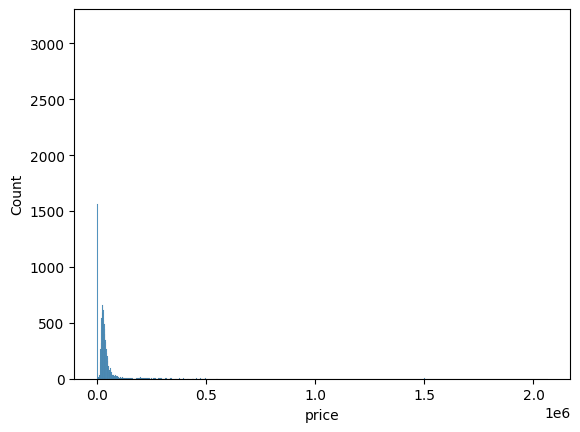

In [29]:
""" decrease the value of price to decrease the skew """
sns.histplot(x='price', data=ds)
ds["log_price"] = np.log1p(ds.price)

ds.head()
sns.histplot(ds["log_price"], bins=20)

## Data Null

In [30]:
ds.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
price                   0
log_price               0
dtype: int64

## Take the part of data to do test on it

In [31]:
bases = ["engine_hp", "engine_cylinders", "highway_mpg", "city_mpg", "popularity","log_price"]

# ds.info()

# ds[bases]

ds[bases].isnull().sum()

engine_hp           69
engine_cylinders    30
highway_mpg          0
city_mpg             0
popularity           0
log_price            0
dtype: int64

## Missing Values

In [32]:
def preper_data(ds):
    x = ds[bases].fillna(ds[bases].mean())
    return x.values

<Axes: >

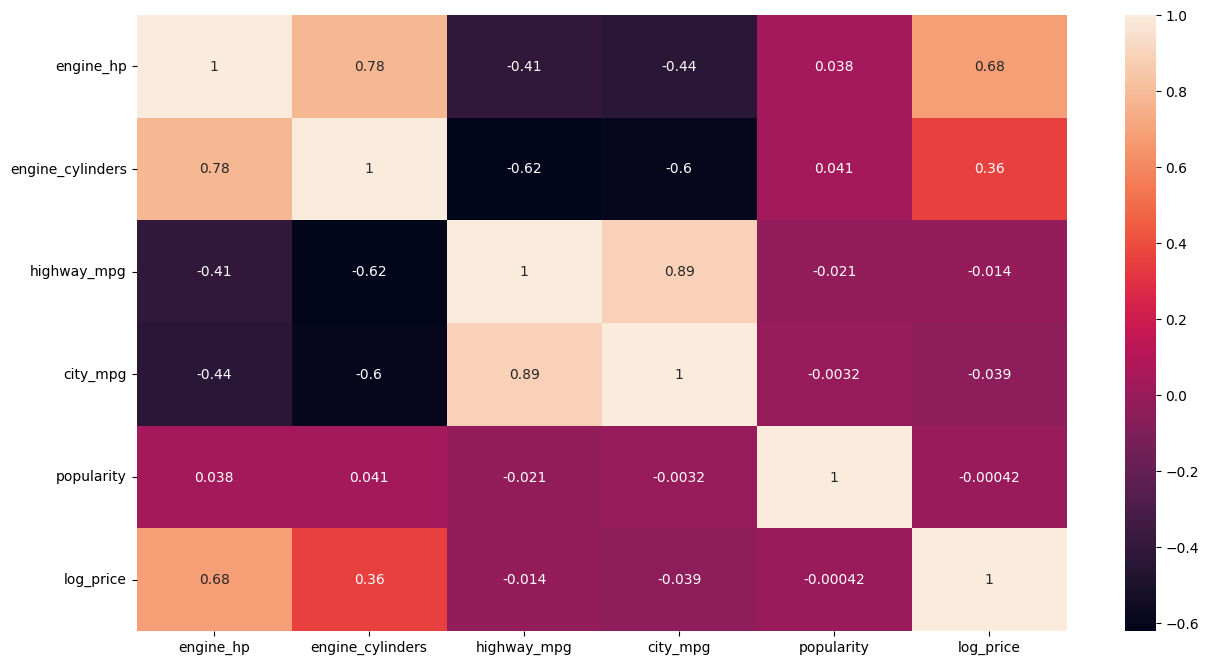

In [33]:
plt.figure(figsize=(15, 8))
sns.heatmap(ds[bases].corr(), annot=True)

## Linear Regression For predict

In [37]:
def predict_train(x_train,y_train):
    """ accuracy for train data"""
    y_pred = lr.predict(x_train)
    train_accuracy_r2 = r2_score(y_train,y_pred)
    MSE = mean_squared_error(y_train,y_pred)
    MAE = mean_absolute_error(y_train,y_pred)
    
    # print(y_pred)
    # print(y_train)
    print("r2_score train=",train_accuracy_r2)
    print("mean_squared_error train=",MSE)
    print("mean_absolute_error train=",MAE)
    
def predict_test(x_test,y_test):
    """ accuracy for train data"""
    y_pred = lr.predict(x_test)
    train_accuracy_r2 = r2_score(y_test,y_pred)
    MSE = mean_squared_error(y_test,y_pred)
    MAE = mean_absolute_error(y_test,y_pred)
    
    # print(y_pred)
    # print(y_train)
    print("r2_score test=",train_accuracy_r2)
    print("mean_squared_error test=",MSE)
    print("mean_absolute_error test=",MAE)

# Training data for string or object
### categorical data
##### one hot encoding

In [38]:
ds.make.value_counts().head(6)

make
chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
nissan         558
Name: count, dtype: int64

In [39]:
def NewFutures(ds):
  
    ds=ds.copy()
    features=bases.copy()
    ds['age'] = 2017 - ds['year']
    features.append('age')
    
    for i in [2,3,4]:
        new_feature=("number_of_doors_%s" %i)
        ds[new_feature] = (ds["number_of_doors"] == i).astype(int)
        features.append(new_feature)
    for i in ["manual","automatic"]:
        new_feature=("transmission_type_%s" %i)
        ds[new_feature] = (ds["transmission_type"] == i).astype(int)
        features.append(new_feature)

    for i in ["chevrolet","ford","volkswagen","toyota","dodge","nissan"]:
        new_feature=("make_%s" %i)
        ds[new_feature] = (ds["make"] == i).astype(int)
        features.append(new_feature)
        
    
    # print(ds[features].head())
    
    
    ds_num=ds[features]
    ds_num=ds_num.fillna(ds_num.mean())
    return ds_num

# print(number_of_doors_And_make(ds))

new_ds=NewFutures(ds)
# print(new_ds.shape)
without_price=new_ds.drop(columns=["log_price"])

# print(new_ds.shape)
# print(type(new_ds))

""" to save a new data in the new file .csv"""
# new_ds.to_csv('updated_data1.csv', index=False)

x_train, x_test, y_train, y_test = train_test_split(without_price, new_ds['log_price'], test_size=0.2, shuffle=True)


lr = LinearRegression()
lr.fit(x_train, y_train)
predict_train(x_train,y_train)
print("################################################")
predict_test(x_test,y_test)

r2_score train= 0.8067524058677554
mean_squared_error train= 0.23934768184048105
mean_absolute_error train= 0.3655945273358488
################################################
r2_score test= 0.7867127428697911
mean_squared_error test= 0.24646182410075512
mean_absolute_error test= 0.37375791699488853
